In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv") 
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### data set about Loan Application Status Prediction 
#### There is 614 rows and 13 columns.
#### There is so much nulls present

In [7]:
for column in data.columns:
    unique_count = data[column].nunique()
    print(column,"==", unique_count)

Loan_ID == 614
Gender == 2
Married == 2
Dependents == 4
Education == 2
Self_Employed == 2
ApplicantIncome == 505
CoapplicantIncome == 287
LoanAmount == 203
Loan_Amount_Term == 10
Credit_History == 2
Property_Area == 3
Loan_Status == 2


In [8]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [9]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### now nulls are removed

In [10]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### loan_id is not useful for our project

In [11]:
data = data.drop(columns=['Loan_ID'])
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


##### encode the columns using OrdinalEncoder

In [12]:
data["Dependents"].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
from sklearn.preprocessing import OrdinalEncoder
enc_columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
encoder = OrdinalEncoder()

for column in enc_columns:
    data[column] = encoder.fit_transform(data[[column]])
    
print(data.head())


   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0     1.0      0.0         0.0        0.0            0.0             5849   
1     1.0      1.0         1.0        0.0            0.0             4583   
2     1.0      1.0         0.0        0.0            1.0             3000   
3     1.0      1.0         0.0        1.0            0.0             2583   
4     1.0      0.0         0.0        0.0            0.0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

   Property_Area  Loan_Status  
0            2.0          1.0  
1            0.0          0.0  
2            2.0    

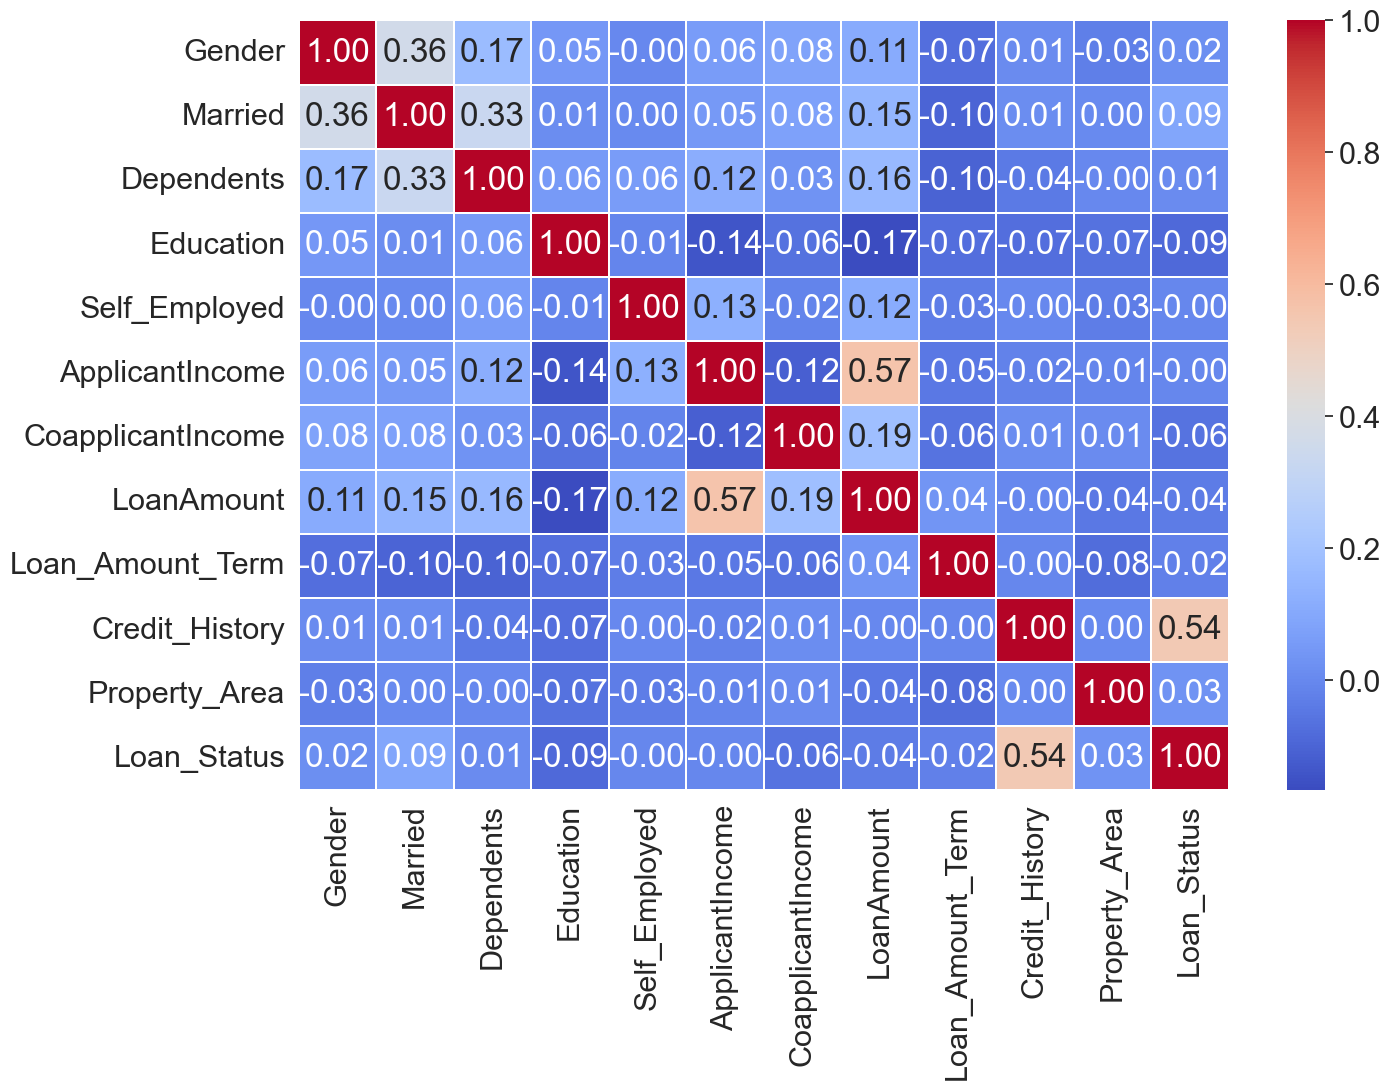

In [14]:
plt.figure(figsize = (15,10))
sns.set(font_scale = 2)
sns.heatmap(data.corr(),linewidths=0.2,cmap='coolwarm', fmt=".2f", annot = True)
plt.show()

#### There is no Multicollinearity problem
#### lable is highly correlation with one feature 'Credit_History' other is low correlated.

In [15]:
corr_data = data.corr()

In [16]:
corr_data['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.022549
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

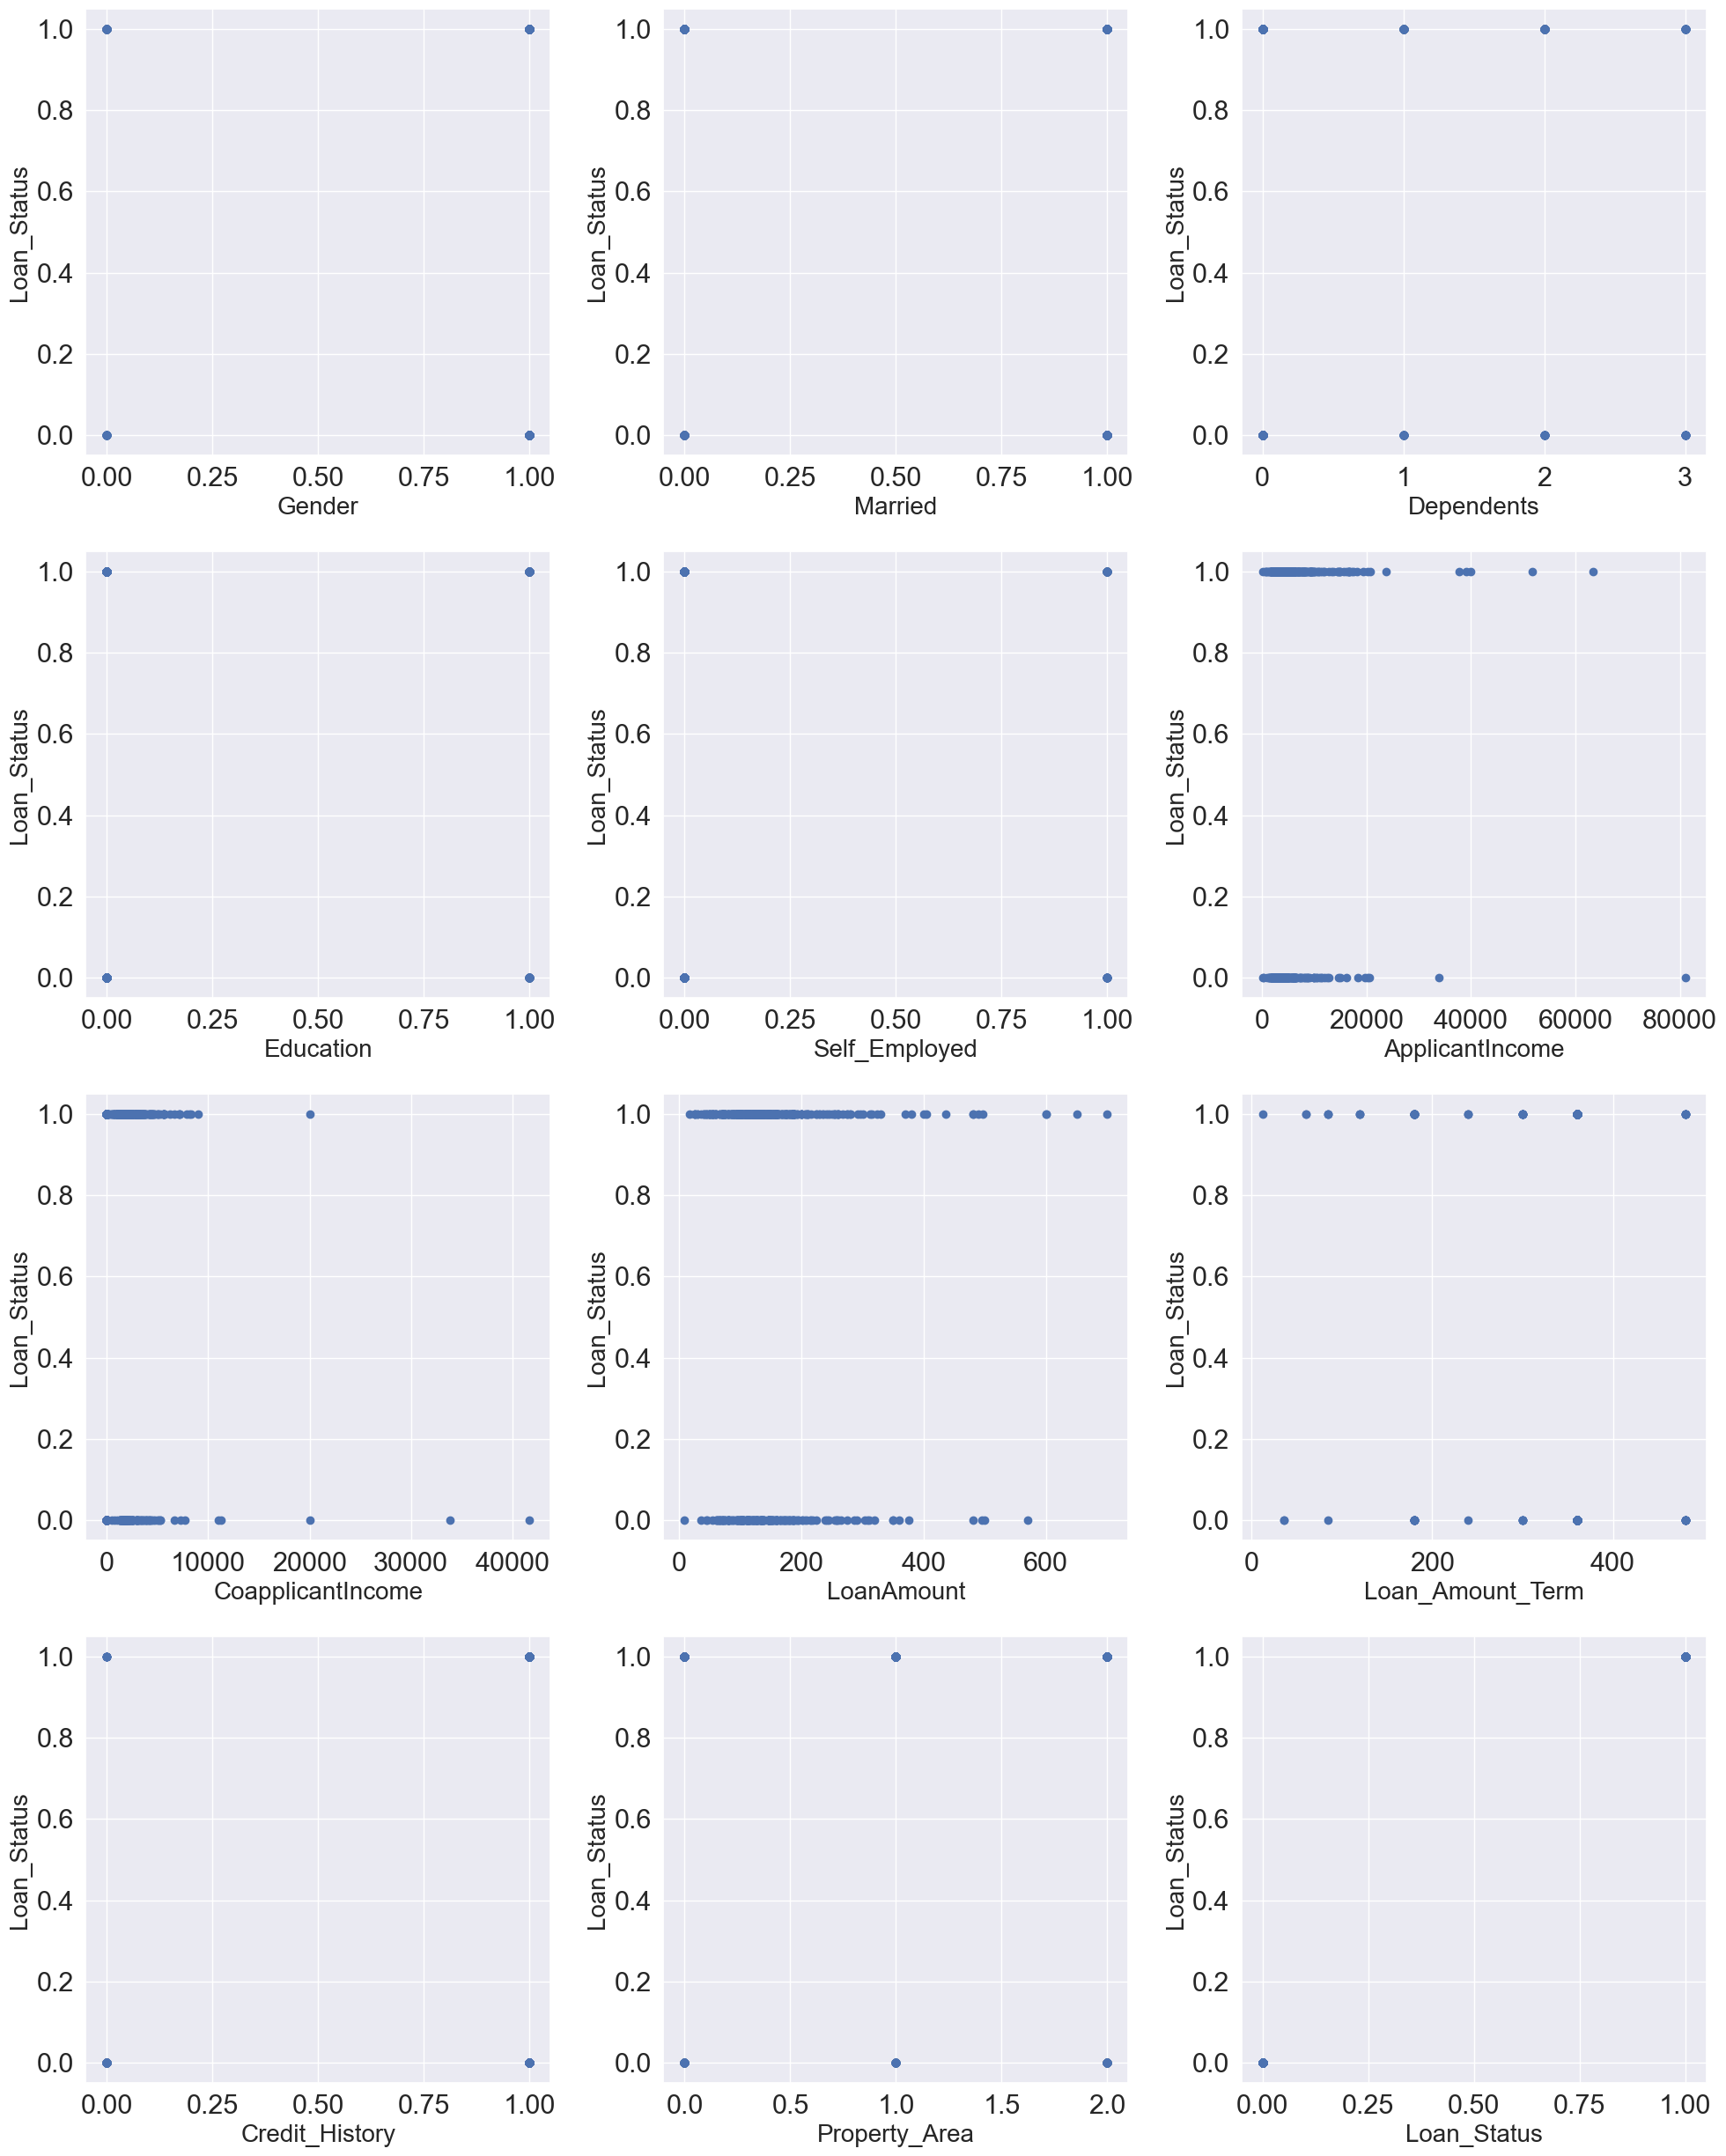

In [17]:
plt.figure(figsize=(20, 25),edgecolor='red')
plotnumber = 1

for column in data.columns:
    if plotnumber <= 12:
        plt.subplot(4, 3, plotnumber)
        plt.scatter(x=data[column], y=data['Loan_Status'])
        plt.xlabel(column, fontsize=20)
        plt.ylabel("Loan_Status", fontsize=20)
    
    plotnumber += 1

plt.tight_layout()  
plt.show()

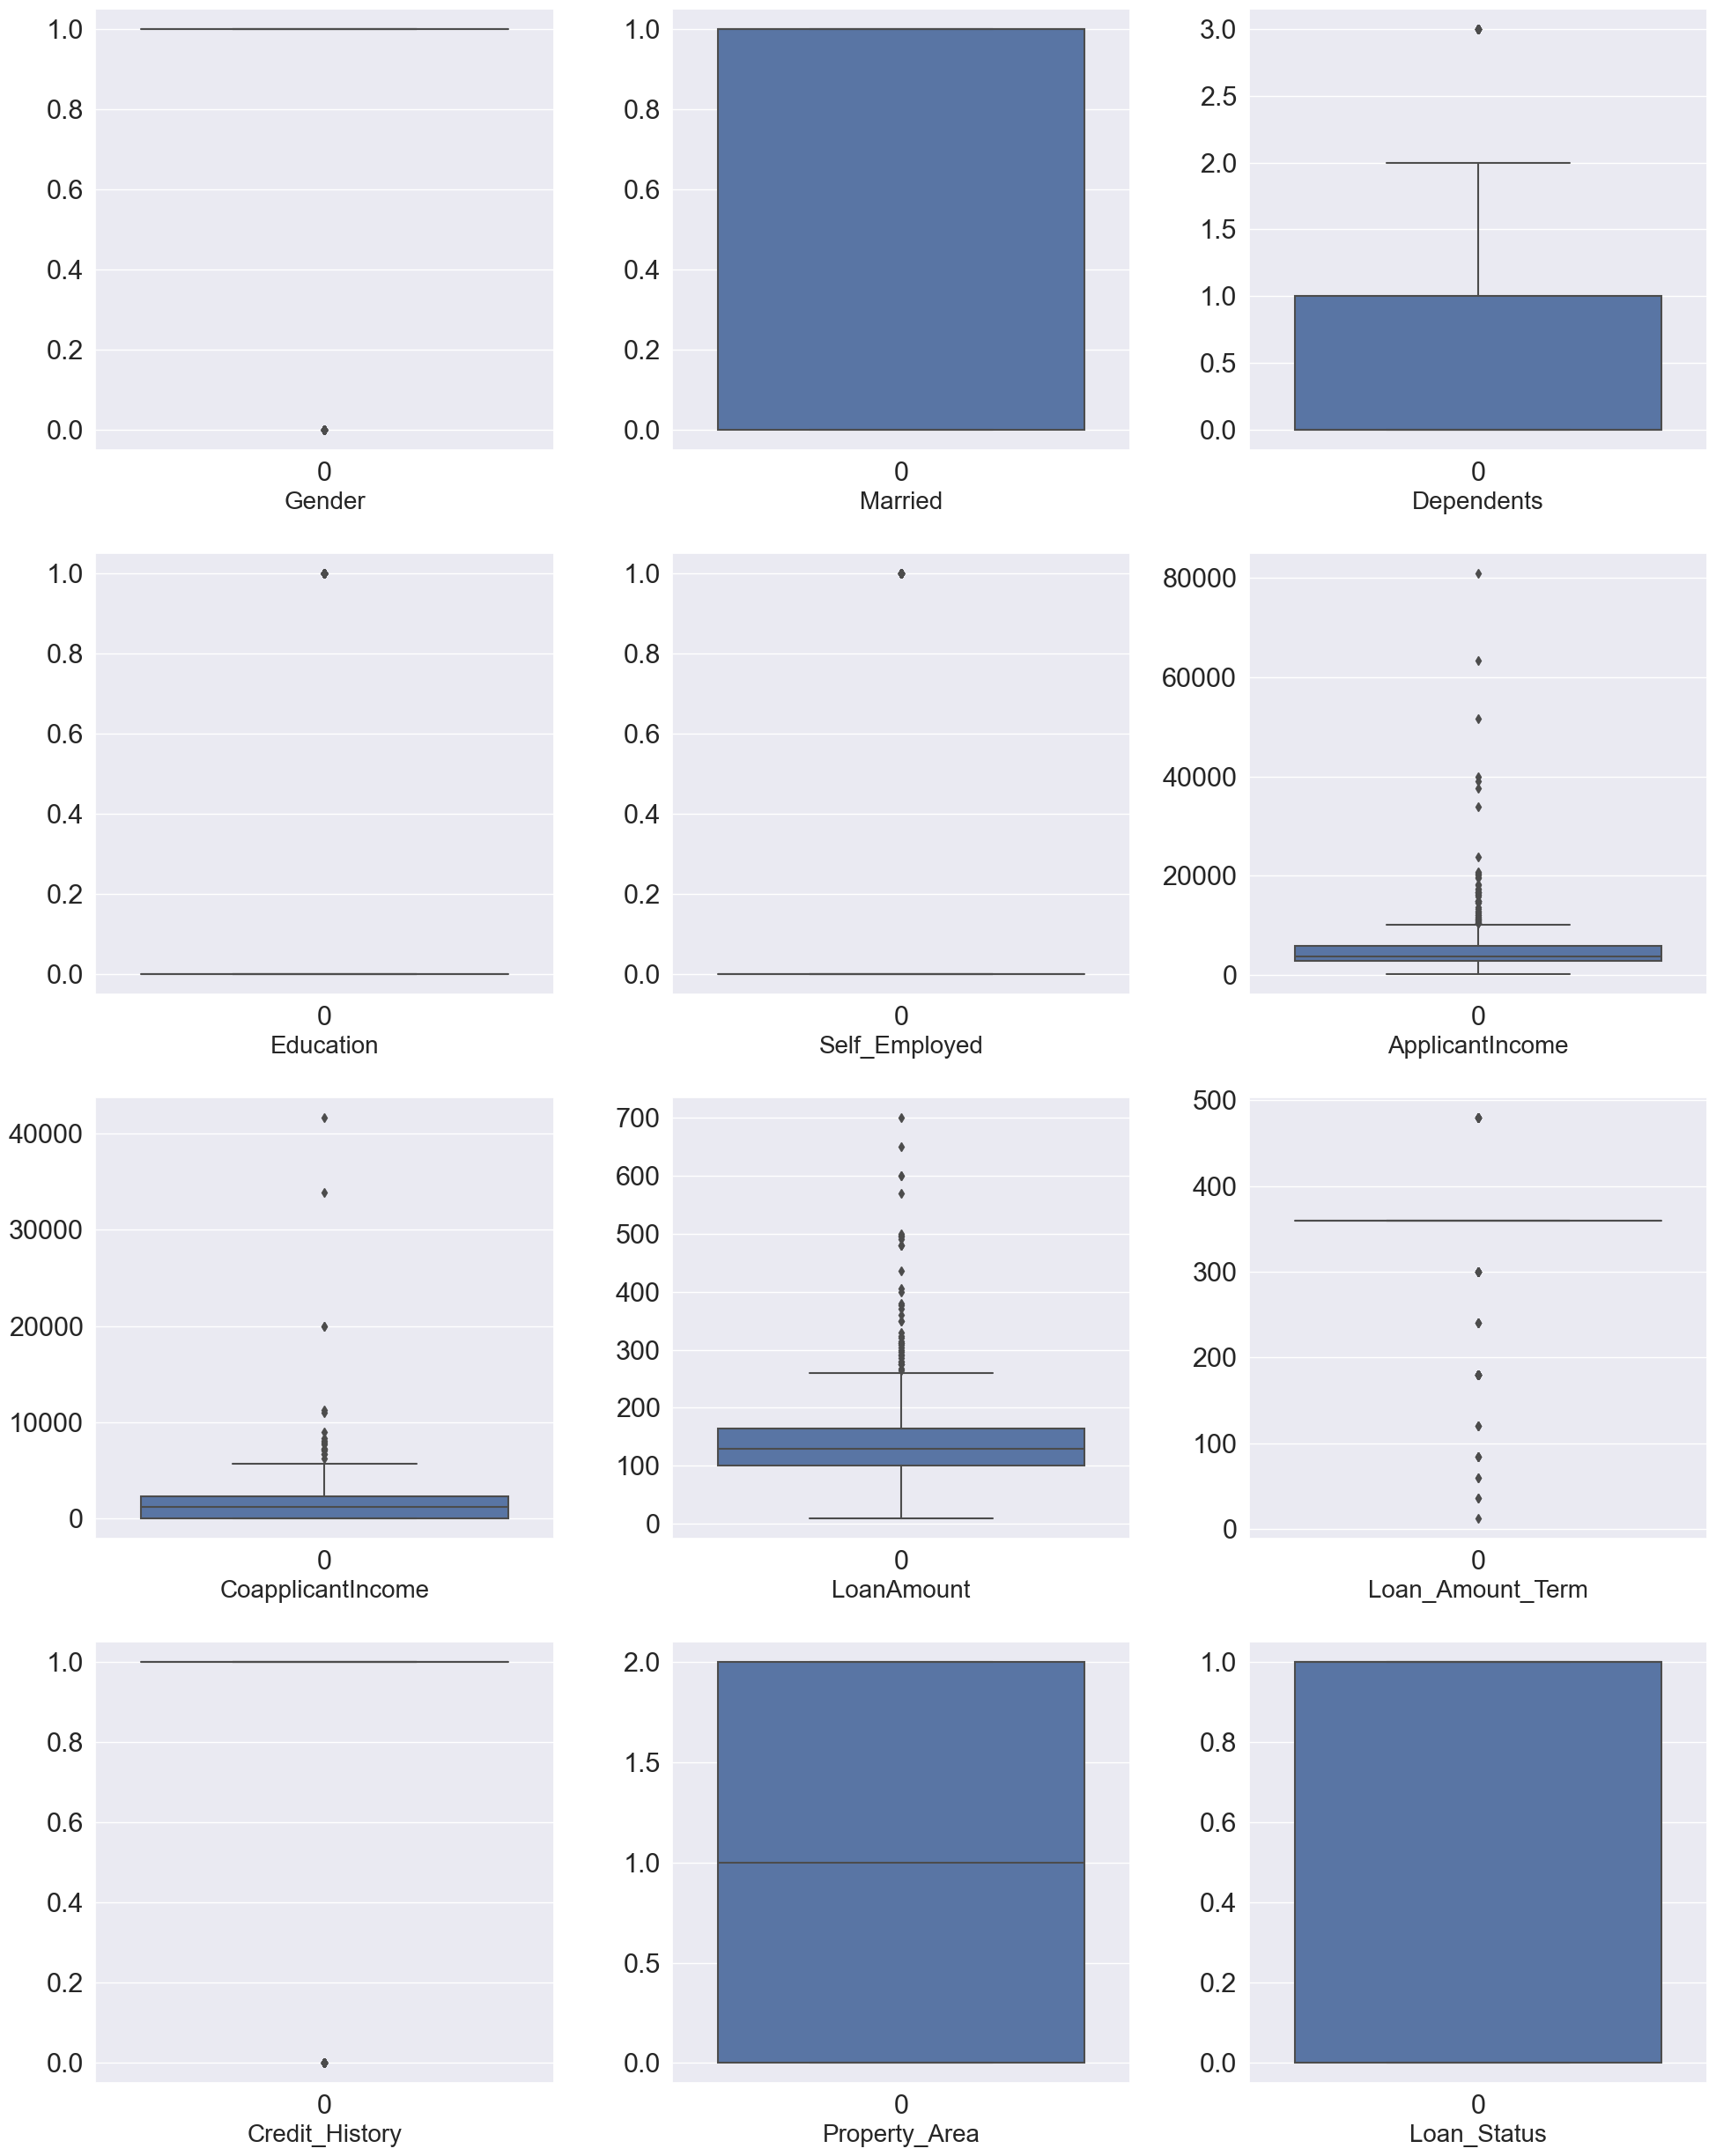

In [18]:
plt.figure(figsize=(20, 25))
graph = 1
for column in data.columns:
    if graph <= 12:
        plt.subplot(4, 3, graph)
        ax = sns.boxplot(data=data[column])  
        plt.xlabel(column, fontsize=20)
    graph += 1


plt.tight_layout()
plt.show()


#### CoapplicantIncome, ApplicantIncome, LoanAmount has outliers

#### Find the IQR to identify outliers

In [19]:
data_copy = data.copy(deep = True)   

In [20]:
q1 = data_copy.quantile(0.25)
q3 = data_copy.quantile(0.75)

#IQR
iqr = q3 - q1

In [21]:
co_high = (q3['CoapplicantIncome'] + (1.5* iqr['CoapplicantIncome']))
print(co_high)

co_index= np.where(data_copy['CoapplicantIncome']> co_high) 
print (co_index)

data_copy = data_copy.drop(data_copy.index[co_index])
print (data_copy.shape ) 

data_copy.reset_index()

5743.125
(array([  9,  12,  38, 122, 135, 177, 180, 253, 349, 372, 402, 417, 444,
       506, 513, 523, 581, 600], dtype=int64),)
(596, 12)


,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
592,610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
593,611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
594,612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [22]:
ai_high = (q3['ApplicantIncome'] + (1.5* iqr['ApplicantIncome']))
print(ai_high)

ai_index= np.where(data_copy['ApplicantIncome']> ai_high) 
print (ai_index)

data_copy = data_copy.drop(data_copy.index[ai_index])
print (data_copy.shape ) 

data_copy.reset_index()

10171.25
(array([ 32,  51,  64,  99, 103, 112, 116, 122, 124, 126, 133, 139, 141,
       150, 166, 176, 178, 184, 192, 246, 250, 263, 270, 276, 300, 316,
       325, 360, 361, 398, 412, 420, 426, 431, 454, 462, 465, 470, 474,
       480, 495, 509, 517, 518, 545, 556, 577, 586], dtype=int64),)
(548, 12)


,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
544,610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
545,611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
546,612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [23]:
la_high = (q3['LoanAmount'] + (1.5* iqr['LoanAmount']))
print(la_high)

la_index= np.where(data_copy['LoanAmount']> la_high) 
print (la_index)

data_copy = data_copy.drop(data_copy.index[la_index])
print (data_copy.shape ) 

data_copy.reset_index()

261.5
(array([  5,  19,  77, 142, 207, 231, 291, 315, 342, 352, 458, 476, 529],
      dtype=int64),)
(535, 12)


,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
531,610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
532,611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
533,612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


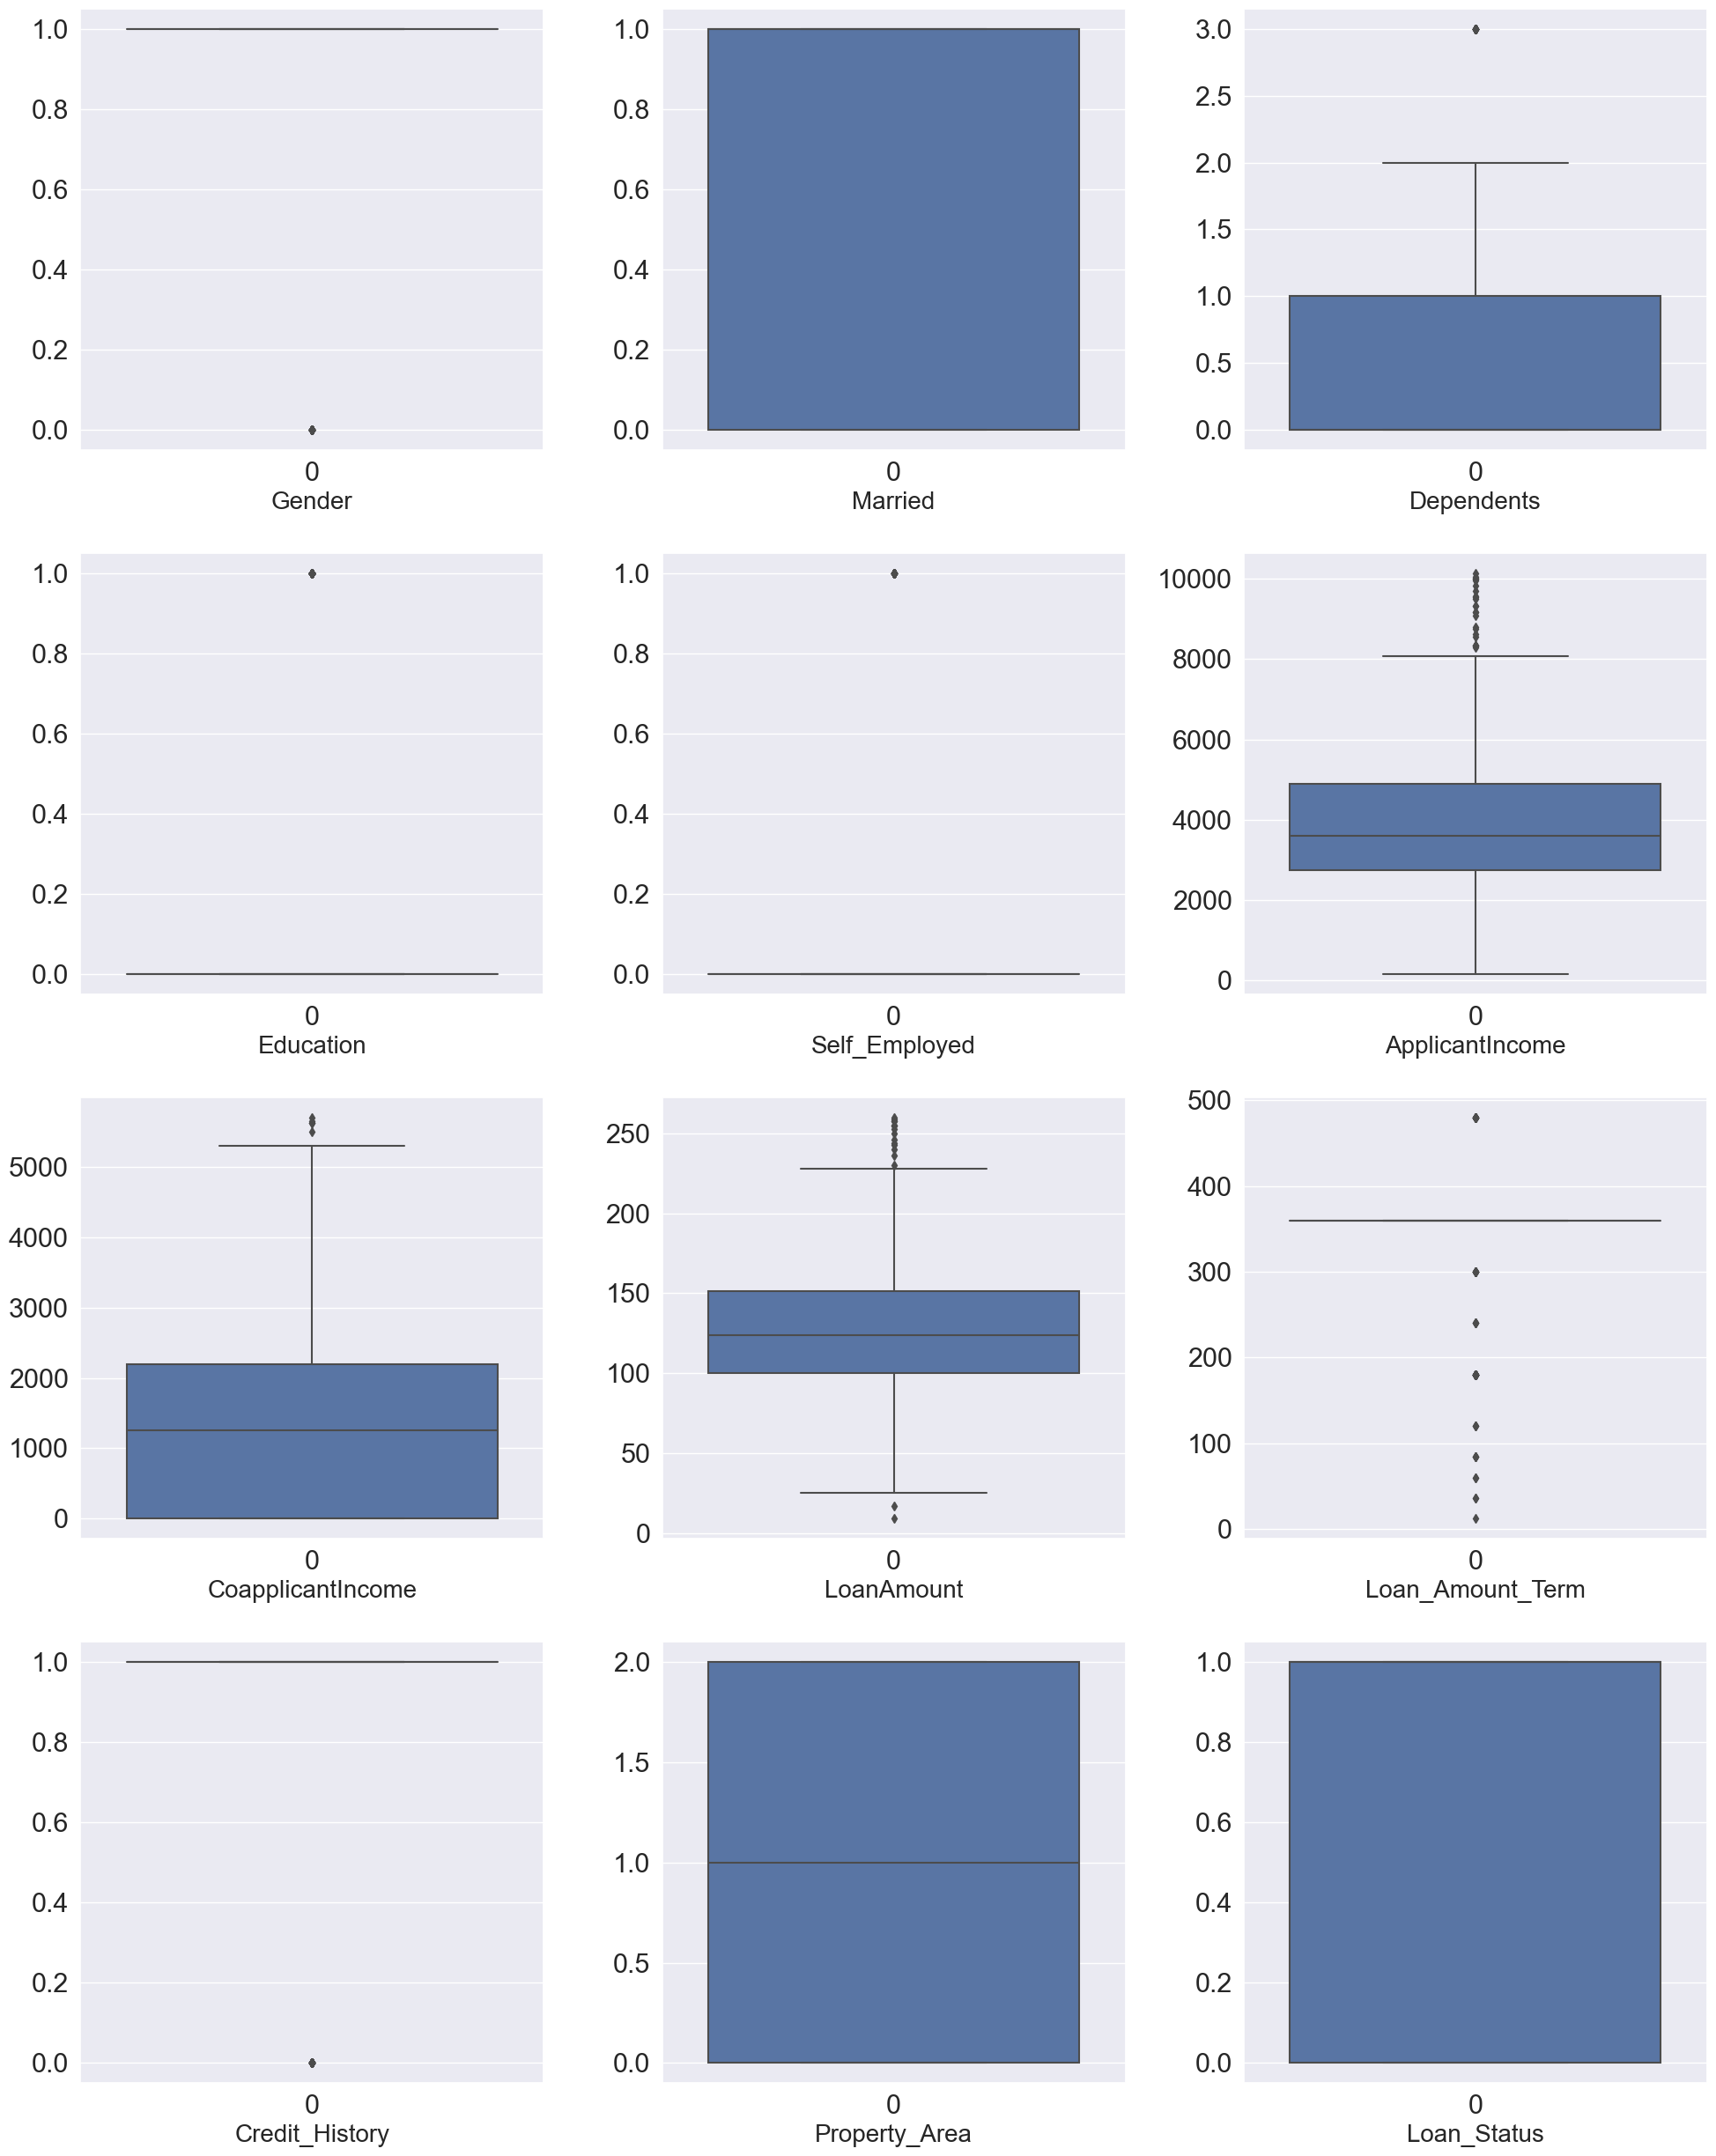

In [24]:
plt.figure(figsize=(20, 25))
graph = 1
for column in data_copy.columns:
    if graph <= 12:
        plt.subplot(4, 3, graph)
        ax = sns.boxplot(data=data_copy[column])  
        plt.xlabel(column, fontsize=20)
    graph += 1


plt.tight_layout()
plt.show()

#### Now data is better

In [25]:
data_copy.skew()

Gender              -1.610722
Married             -0.632901
Dependents           1.047353
Education            1.190026
Self_Employed        2.435658
ApplicantIncome      1.142234
CoapplicantIncome    0.845905
LoanAmount           0.401178
Loan_Amount_Term    -2.428175
Credit_History      -2.013048
Property_Area       -0.032908
Loan_Status         -0.851141
dtype: float64

##### In these, only applicant income, coapplicant income and loan amount are continuous data.  Therefore we will remove the skewness of this.  All  other are categorical.

In [26]:
data_copy['ApplicantIncome'] = np.cbrt(data_copy['ApplicantIncome'])
data_copy['CoapplicantIncome'] = np.cbrt(data_copy['CoapplicantIncome'])

In [27]:
data_copy.skew()

Gender              -1.610722
Married             -0.632901
Dependents           1.047353
Education            1.190026
Self_Employed        2.435658
ApplicantIncome      0.127408
CoapplicantIncome   -0.113862
LoanAmount           0.401178
Loan_Amount_Term    -2.428175
Credit_History      -2.013048
Property_Area       -0.032908
Loan_Status         -0.851141
dtype: float64

#### skewness removed

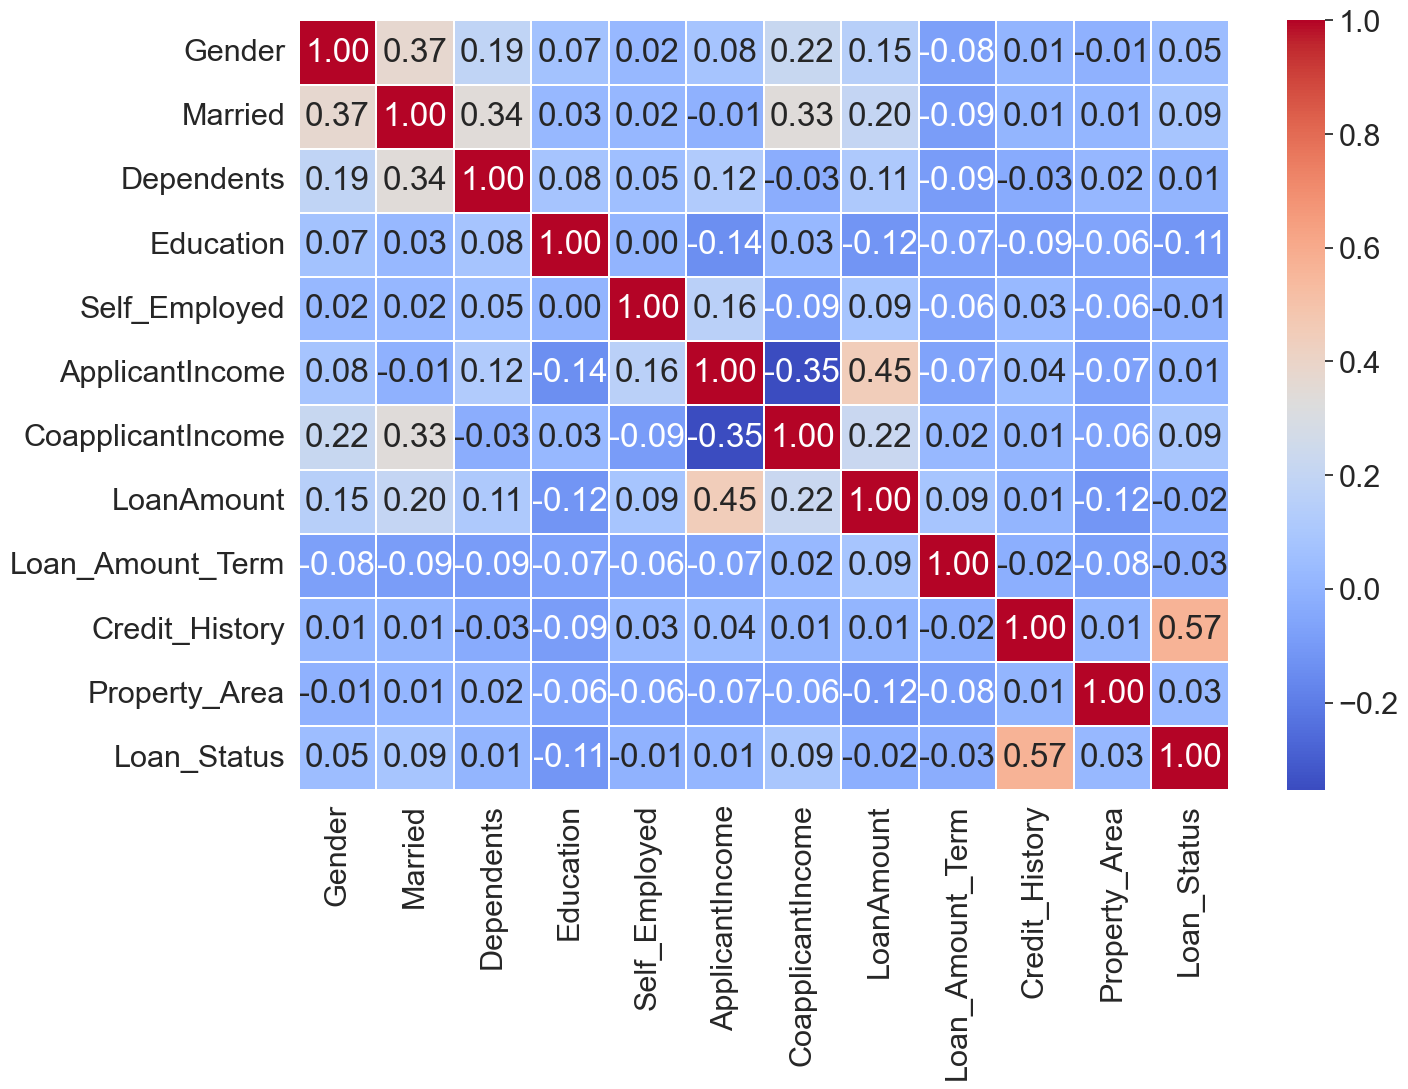

In [28]:
plt.figure(figsize = (15,10))
sns.set(font_scale = 2)
sns.heatmap(data_copy.corr(),linewidths=0.2,cmap='coolwarm', fmt=".2f", annot = True)
plt.show()

#### There is no problem of multicollinearity in any column. However, the correlation of any feature with the label is not very good,  Except credit history, But all these features are important for granting loan.  So we will not delete any of this.

In [29]:
X = data_copy.drop(columns = ['Loan_Status']) 
y = data_copy['Loan_Status']                  

In [30]:
y.value_counts()

1.0    372
0.0    163
Name: Loan_Status, dtype: int64

#### Data is balanced

In [31]:
scalar = StandardScaler() 
x_scaled = scalar.fit_transform(X)

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20, random_state= 900)

In [33]:
# Write a function and call as many as time to check accuracy_score of different models
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n========================Train Result======================\n")
        print(f"Accuracy Score:  {accuracy_score(y_train, y_pred) * 100:.2f}%")
        
    elif train==False:
        pred = clf.predict(x_test)
        print("\n========================Test Result==========================")
        print(f"Accuracy Score:  {accuracy_score(y_test, pred) * 100:.2f}%")
        print('\n \n Test Classifiction Report \n', classification_report(y_test, pred,digits=2))

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### LogisticRegression

In [35]:
# Training and initiation name to modal
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [36]:
metric_score(log,x_train,x_test,y_train,y_test, train=True)        #This is for training score 
metric_score(log,x_train,x_test,y_train,y_test, train=False)       #This is fore testing score


========================Train Result======================

Accuracy Score:  82.48%

========================Test Result==========================
Accuracy Score:  81.31%

 
 Test Classifiction Report 
               precision    recall  f1-score   support

         0.0       0.88      0.45      0.60        33
         1.0       0.80      0.97      0.88        74

    accuracy                           0.81       107
   macro avg       0.84      0.71      0.74       107
weighted avg       0.83      0.81      0.79       107



In [37]:
y_pred_log= log.predict(x_test)
y_pred_log

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [38]:
conf_mat_log= confusion_matrix(y_test,y_pred_log)            

conf_mat_log

array([[15, 18],
       [ 2, 72]], dtype=int64)

### DecisionTreeClassifier

In [39]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True) 
metric_score(clf,x_train,x_test,y_train,y_test, train=False)       


========================Train Result======================

Accuracy Score:  100.00%

========================Test Result==========================
Accuracy Score:  71.03%

 
 Test Classifiction Report 
               precision    recall  f1-score   support

         0.0       0.53      0.55      0.54        33
         1.0       0.79      0.78      0.79        74

    accuracy                           0.71       107
   macro avg       0.66      0.66      0.66       107
weighted avg       0.71      0.71      0.71       107



In [41]:
y_pred_clf= clf.predict(x_test)
y_pred_clf

array([0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0.])

In [42]:
conf_mat_clf= confusion_matrix(y_test,y_pred_clf)            

conf_mat_clf

array([[18, 15],
       [16, 58]], dtype=int64)

### RandomForestClassifier

In [43]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [44]:
metric_score(rfc,x_train,x_test,y_train,y_test, train=True) 
metric_score(rfc,x_train,x_test,y_train,y_test, train=False)      


========================Train Result======================

Accuracy Score:  100.00%

========================Test Result==========================
Accuracy Score:  77.57%

 
 Test Classifiction Report 
               precision    recall  f1-score   support

         0.0       0.71      0.45      0.56        33
         1.0       0.79      0.92      0.85        74

    accuracy                           0.78       107
   macro avg       0.75      0.69      0.70       107
weighted avg       0.77      0.78      0.76       107



In [45]:
y_pred_rfc= rfc.predict(x_test)
y_pred_rfc

array([0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [46]:
conf_mat_rfc= confusion_matrix(y_test,y_pred_rfc)            

conf_mat_rfc

array([[15, 18],
       [ 6, 68]], dtype=int64)

### KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [48]:
metric_score(knn,x_train,x_test,y_train,y_test, train=True) 
metric_score(knn,x_train,x_test,y_train,y_test, train=False)   


========================Train Result======================

Accuracy Score:  82.94%

========================Test Result==========================
Accuracy Score:  77.57%

 
 Test Classifiction Report 
               precision    recall  f1-score   support

         0.0       0.74      0.42      0.54        33
         1.0       0.78      0.93      0.85        74

    accuracy                           0.78       107
   macro avg       0.76      0.68      0.70       107
weighted avg       0.77      0.78      0.76       107



In [49]:
y_pred_knn= knn.predict(x_test)
y_pred_knn

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1.])

In [50]:
conf_mat_knn= confusion_matrix(y_test,y_pred_knn)            

conf_mat_knn

array([[14, 19],
       [ 5, 69]], dtype=int64)

In [51]:
##### LogisticRegression model is best so i will select it

In [52]:
import pickle

In [53]:
pickle.dump(log,open('Loan_Status','wb'))